In [983]:

print(__doc__)

#import needed libraries
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import bokeh.plotting
from bokeh.plotting import figure
from sklearn import preprocessing, neighbors, tree
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


Automatically created module for IPython interactive environment


In [984]:
# We utilized the titanic example to help us preprocess the data

In [985]:
#read the csv into a dataframe
def parse(x):return pd.datetime.strptime(x, '%m/%d/%Y')
data_frame = pd.read_csv('GasPricePredictorTrainingSet.csv', index_col=0, date_parser=parse)


In [986]:
#Creating additional two columns for months and days and join these two columns to make the dataset more clear
datadates = data_frame.index.values
datamonths = pd.Series(data=[pd.to_datetime(x).month for x in datadates], index=datadates, name='Month')
datadays = pd.Series([pd.to_datetime(x).day for x in datadates], index=datadates, name='Day')
datamonths = datamonths.to_frame().join(datadays.to_frame())
data_frame = datamonths.join(data_frame)

In [987]:
data_frame

,Month,Day,All Grades All Formulations,All Grades Conventional,All Grades Reformulated,Regular All Formulations,Regular Conventional,Regular Reformulated,Midgrade All Formulations,Midgrade Conventional,Midgrade Reformulated,Premium All Formulations Retail,Premium Conventional,Premium Reformulated,Diesel
1990-08-20,8,20,NaN,NaN,NaN,1.191,1.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-27,8,27,NaN,NaN,NaN,1.245,1.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-03,9,3,NaN,NaN,NaN,1.242,1.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-10,9,10,NaN,NaN,NaN,1.252,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-17,9,17,NaN,NaN,NaN,1.266,1.266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-24,9,24,NaN,NaN,NaN,1.272,1.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-01,10,1,NaN,NaN,NaN,1.321,1.321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-08,10,8,NaN,NaN,NaN,1.333,1.333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-15,10,15,NaN,NaN,NaN,1.339,1.339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-10-22,10,22,NaN,NaN,NaN,1.345,1.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [988]:
#Print statistict to see if we have missing values
data_frame.count()

Month                              1472
Day                                1472
All Grades All Formulations        1335
All Grades Conventional            1249
All Grades Reformulated            1249
Regular All Formulations           1466
Regular Conventional               1466
Regular Reformulated               1249
Midgrade All Formulations          1249
Midgrade Conventional              1249
Midgrade Reformulated              1249
Premium All Formulations Retail    1249
Premium Conventional               1249
Premium Reformulated               1249
Diesel                             1285
dtype: int64

In [989]:
#We dropped the data from our dataset that we did not need for our project. 
data_frame1 = data_frame.copy()
data_frame1.drop(['All Grades All Formulations', 'All Grades Reformulated', 'Regular All Formulations', 'Regular Conventional', 
                  'Regular Reformulated', 'Midgrade All Formulations', 'Midgrade Conventional', 'Midgrade Reformulated', 
                  'Premium All Formulations Retail', 'Premium Conventional', 'Premium Reformulated', 'Diesel'], 1, inplace=True)
data_frame1

,Month,Day,All Grades Conventional
1990-08-20,8,20,NaN
1990-08-27,8,27,NaN
1990-09-03,9,3,NaN
1990-09-10,9,10,NaN
1990-09-17,9,17,NaN
1990-09-24,9,24,NaN
1990-10-01,10,1,NaN
1990-10-08,10,8,NaN
1990-10-15,10,15,NaN
1990-10-22,10,22,NaN


In [990]:
data_frame1.count() 

Month                      1472
Day                        1472
All Grades Conventional    1249
dtype: int64

In [991]:
#Let's see what we will get if we drop missing values  
data_frame_without_missing_vals = data_frame1.dropna()
data_frame_without_missing_vals

,Month,Day,All Grades Conventional
1994-11-28,11,28,1.175
1994-12-05,12,5,1.143
1994-12-12,12,12,1.118
1994-12-19,12,19,1.099
1994-12-26,12,26,1.088
1995-01-02,1,2,1.104
1995-01-09,1,9,1.111
1995-01-16,1,16,1.102
1995-01-23,1,23,1.110
1995-01-30,1,30,1.109


In [992]:
data_frame_without_missing_vals.count()

Month                      1249
Day                        1249
All Grades Conventional    1249
dtype: int64

In [993]:
data_frame_imputed = data_frame1.copy()
#Now we impute missing values with mean values.
#Similar strategy was used in DataPreparation tutorial given in class. 
imput = Imputer(missing_values='NaN', strategy='mean', axis=0)
data_frame_imputed = pd.DataFrame(imput.fit_transform(data_frame1))
data_frame_imputed.columns = data_frame1.columns
data_frame_imputed.index = data_frame1.index


In [994]:
data_frame_imputed

,Month,Day,All Grades Conventional
1990-08-20,8.0,20.0,2.218114
1990-08-27,8.0,27.0,2.218114
1990-09-03,9.0,3.0,2.218114
1990-09-10,9.0,10.0,2.218114
1990-09-17,9.0,17.0,2.218114
1990-09-24,9.0,24.0,2.218114
1990-10-01,10.0,1.0,2.218114
1990-10-08,10.0,8.0,2.218114
1990-10-15,10.0,15.0,2.218114
1990-10-22,10.0,22.0,2.218114


In [995]:
data_frame_imputed.describe()

,Month,Day,All Grades Conventional
count,1472.000000,1472.000000,1472.000000
mean,6.543478,15.731658,2.218114
std,3.445725,8.805049,0.809445
min,1.000000,1.000000,0.926000
25%,4.000000,8.000000,1.466750
50%,7.000000,16.000000,2.218114
75%,10.000000,23.000000,2.776500
max,12.000000,31.000000,4.102000


In [996]:
#We decided to use the dropped missing values dataset due to the fact that the standard deviation of our imputed dataset(data_frame_imputed), 
#was greater than that of when we dropped all the missing values(data_frame_without_missing_vals).

In [997]:
#Taken from Dr. Jason Brownlee’s function series_to_supervised from: "https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/"
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [998]:
# frame as a supervised learning problem
reframed = series_to_supervised(data_frame_without_missing_vals, 12, 1)
# Here we dropped the columns we did not want to predict (month and day)
reframed.drop(reframed.columns[[36, 37]], axis=1, inplace=True)

In [999]:
reframed

,var1(t-12),var2(t-12),var3(t-12),var1(t-11),var2(t-11),var3(t-11),var1(t-10),var2(t-10),var3(t-10),var1(t-9),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var3(t)
1995-02-20,11.0,28.0,1.175,12.0,5.0,1.143,12.0,12.0,1.118,12.0,...,1.0,30.0,1.109,2.0,6.0,1.103,2.0,13.0,1.099,1.093
1995-02-27,12.0,5.0,1.143,12.0,12.0,1.118,12.0,19.0,1.099,12.0,...,2.0,6.0,1.103,2.0,13.0,1.099,2.0,20.0,1.093,1.101
1995-03-06,12.0,12.0,1.118,12.0,19.0,1.099,12.0,26.0,1.088,1.0,...,2.0,13.0,1.099,2.0,20.0,1.093,2.0,27.0,1.101,1.103
1995-03-13,12.0,19.0,1.099,12.0,26.0,1.088,1.0,2.0,1.104,1.0,...,2.0,20.0,1.093,2.0,27.0,1.101,3.0,6.0,1.103,1.096
1995-03-20,12.0,26.0,1.088,1.0,2.0,1.104,1.0,9.0,1.111,1.0,...,2.0,27.0,1.101,3.0,6.0,1.103,3.0,13.0,1.096,1.095
1995-03-27,1.0,2.0,1.104,1.0,9.0,1.111,1.0,16.0,1.102,1.0,...,3.0,6.0,1.103,3.0,13.0,1.096,3.0,20.0,1.095,1.102
1995-04-03,1.0,9.0,1.111,1.0,16.0,1.102,1.0,23.0,1.110,1.0,...,3.0,13.0,1.096,3.0,20.0,1.095,3.0,27.0,1.102,1.116
1995-04-10,1.0,16.0,1.102,1.0,23.0,1.110,1.0,30.0,1.109,2.0,...,3.0,20.0,1.095,3.0,27.0,1.102,4.0,3.0,1.116,1.134
1995-04-17,1.0,23.0,1.110,1.0,30.0,1.109,2.0,6.0,1.103,2.0,...,3.0,27.0,1.102,4.0,3.0,1.116,4.0,10.0,1.134,1.149
1995-04-24,1.0,30.0,1.109,2.0,6.0,1.103,2.0,13.0,1.099,2.0,...,4.0,3.0,1.116,4.0,10.0,1.134,4.0,17.0,1.149,1.173


In [1000]:
# The following was taken from two seperate tutorials: 
#"Multivariate Time Series Forecasting with LSTMs in Keras" - https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
#and
# "Using Machine Learning to Predict Retail Gasoline Prices" - https://www.linkedin.com/pulse/using-machine-learning-predict-retail-gasoline-prices-jacob-bourne/

In [1001]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed)

In [1002]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
data_frame_without_missing_vals = scaled
n_train_days =  20 * 52
train = data_frame_without_missing_vals[:n_train_days, :]
test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1003]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1040, 1, 36) (1040,) (197, 1, 36) (197,)


In [1004]:
# create the LSTM neural network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
history = model.fit(train_X, train_y, epochs=50, batch_size=91, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 1040 samples, validate on 197 samples
Epoch 1/50
 - 10s - loss: 0.2086 - val_loss: 0.1073
Epoch 2/50
 - 0s - loss: 0.2071 - val_loss: 0.0950
Epoch 3/50
 - 0s - loss: 0.1733 - val_loss: 0.0575
Epoch 4/50
 - 0s - loss: 0.0955 - val_loss: 0.0379
Epoch 5/50
 - 0s - loss: 0.0496 - val_loss: 0.0425
Epoch 6/50
 - 0s - loss: 0.0597 - val_loss: 0.0371
Epoch 7/50
 - 0s - loss: 0.0438 - val_loss: 0.0390
Epoch 8/50
 - 0s - loss: 0.0484 - val_loss: 0.0338
Epoch 9/50
 - 0s - loss: 0.0409 - val_loss: 0.0347
Epoch 10/50
 - 0s - loss: 0.0449 - val_loss: 0.0522
Epoch 11/50
 - 0s - loss: 0.0589 - val_loss: 0.0325
Epoch 12/50
 - 0s - loss: 0.0378 - val_loss: 0.0333
Epoch 13/50
 - 0s - loss: 0.0419 - val_loss: 0.0475
Epoch 14/50
 - 0s - loss: 0.0583 - val_loss: 0.0308
Epoch 15/50
 - 0s - loss: 0.0369 - val_loss: 0.0357
Epoch 16/50
 - 0s - loss: 0.0450 - val_loss: 0.0435
Epoch 17/50
 - 0s - loss: 0.0557 - val_loss: 0.0306
Epoch 18/50
 - 0s - loss: 0.0362 - val_loss: 0.0398
Epoch 19/50
 - 0s - loss:

In [1005]:
# Here we predict the gas prices
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

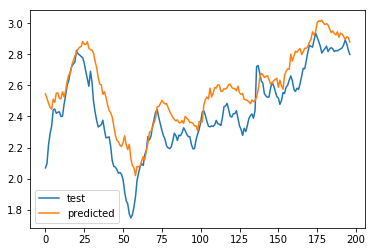

In [1006]:
# Here we plotted the results to see it visually
pyplot.plot(inv_y, label='test')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()

In [1007]:
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.169


In [1008]:
GasPricePrediction = inv_yhat

In [1009]:
#Tweak number 1, We changed the number of variables to 1 to have a single input for each feature(columns)

In [1010]:
# frame as a supervised learning problem
reframed1 = series_to_supervised(data_frame_without_missing_vals, 1, 1)
# Here we dropped the columns we did not want to predict (month and day)
reframed1.drop(reframed1.columns[[3, 4]], axis=1, inplace=True)

In [1011]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed1)

In [1012]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
data_frame_without_missing_vals = scaled
n_train_days =  20 * 52
train = data_frame_without_missing_vals[:n_train_days, :]
test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1013]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1040, 1, 71) (1040,) (196, 1, 71) (196,)


In [1014]:
# create the LSTM neural network
model1 = Sequential()
model1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(Dense(1))
model1.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
history = model1.fit(train_X, train_y, epochs=50, batch_size=91, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 1040 samples, validate on 196 samples
Epoch 1/50
 - 10s - loss: 0.1549 - val_loss: 0.1853
Epoch 2/50
 - 0s - loss: 0.2941 - val_loss: 0.0717
Epoch 3/50
 - 0s - loss: 0.2052 - val_loss: 0.1407
Epoch 4/50
 - 0s - loss: 0.0490 - val_loss: 0.0750
Epoch 5/50
 - 0s - loss: 0.0679 - val_loss: 0.0406
Epoch 6/50
 - 0s - loss: 0.0553 - val_loss: 0.0375
Epoch 7/50
 - 0s - loss: 0.0613 - val_loss: 0.0850
Epoch 8/50
 - 0s - loss: 0.0997 - val_loss: 0.0350
Epoch 9/50
 - 0s - loss: 0.0393 - val_loss: 0.0395
Epoch 10/50
 - 0s - loss: 0.0406 - val_loss: 0.0444
Epoch 11/50
 - 0s - loss: 0.0387 - val_loss: 0.0349
Epoch 12/50
 - 0s - loss: 0.0366 - val_loss: 0.0335
Epoch 13/50
 - 0s - loss: 0.0354 - val_loss: 0.0486
Epoch 14/50
 - 0s - loss: 0.0404 - val_loss: 0.0365
Epoch 15/50
 - 0s - loss: 0.0362 - val_loss: 0.0325
Epoch 16/50
 - 0s - loss: 0.0362 - val_loss: 0.0362
Epoch 17/50
 - 0s - loss: 0.0398 - val_loss: 0.0506
Epoch 18/50
 - 0s - loss: 0.0342 - val_loss: 0.0338
Epoch 19/50
 - 0s - loss:

In [1015]:
# Here we predict the gas prices
yhat = model1.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
rmse1 = sqrt(mean_squared_error(inv_y, inv_yhat))

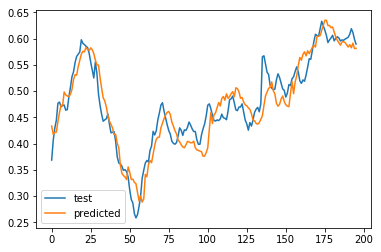

In [1016]:
# Here we plotted the results to see it visually
pyplot.plot(inv_y, label='test')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()

In [1017]:
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 0.031


In [1018]:
#Tweak number 2, We changed number of EPOCH(estimated predication of current history) on the base model

In [1019]:
# frame as a supervised learning problem
reframed2 = series_to_supervised(data_frame_without_missing_vals, 12, 1)
# Here we dropped the columns we did not want to predict (month and day)
reframed2.drop(reframed2.columns[[36, 37]], axis=1, inplace=True)

In [1020]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed2)

In [1021]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
data_frame_without_missing_vals = scaled
n_train_days =  20 * 52
train = data_frame_without_missing_vals[:n_train_days, :]
test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1022]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1040, 1, 933) (1040,) (184, 1, 933) (184,)


In [1023]:
# create the LSTM neural network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
history = model2.fit(train_X, train_y, epochs=100, batch_size=91, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 1040 samples, validate on 184 samples
Epoch 1/100
 - 11s - loss: 0.1843 - val_loss: 0.2884
Epoch 2/100
 - 0s - loss: 0.3554 - val_loss: 0.1896
Epoch 3/100
 - 0s - loss: 0.0665 - val_loss: 0.2140
Epoch 4/100
 - 0s - loss: 0.0894 - val_loss: 0.1039
Epoch 5/100
 - 0s - loss: 0.1493 - val_loss: 0.0925
Epoch 6/100
 - 0s - loss: 0.1185 - val_loss: 0.0651
Epoch 7/100
 - 0s - loss: 0.0693 - val_loss: 0.0532
Epoch 8/100
 - 0s - loss: 0.0725 - val_loss: 0.1111
Epoch 9/100
 - 0s - loss: 0.1053 - val_loss: 0.0745
Epoch 10/100
 - 0s - loss: 0.0740 - val_loss: 0.1004
Epoch 11/100
 - 0s - loss: 0.0805 - val_loss: 0.0598
Epoch 12/100
 - 0s - loss: 0.0535 - val_loss: 0.0587
Epoch 13/100
 - 0s - loss: 0.0531 - val_loss: 0.0845
Epoch 14/100
 - 0s - loss: 0.0564 - val_loss: 0.0751
Epoch 15/100
 - 0s - loss: 0.0496 - val_loss: 0.0503
Epoch 16/100
 - 1s - loss: 0.0550 - val_loss: 0.1074
Epoch 17/100
 - 1s - loss: 0.0720 - val_loss: 0.0546
Epoch 18/100
 - 1s - loss: 0.0492 - val_loss: 0.0526
Epoch 1

In [1024]:
# Here we predict the gas prices
yhat = model2.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
rmse2 = sqrt(mean_squared_error(inv_y, inv_yhat))

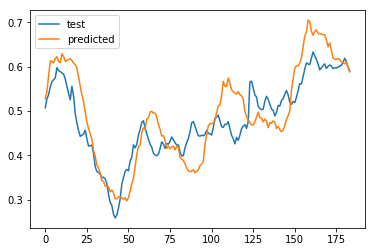

In [1025]:
# Here we plotted the results to see it visually
pyplot.plot(inv_y, label='test')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()

In [1026]:
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 0.057


In [1027]:
#Tweak number 3, #We changed number of EPOCH(estimated predication of current history) when  when we changed the number 
#of variables to 1 to have a single input for each feature(columns)

In [1028]:
# frame as a supervised learning problem
reframed3 = series_to_supervised(data_frame_without_missing_vals, 1, 1)
# Here we dropped the columns we did not want to predict (month and day)
reframed3.drop(reframed3.columns[[3, 4]], axis=1, inplace=True)

In [1029]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed3)

In [1030]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
data_frame_without_missing_vals = scaled
n_train_days =  20 * 52
train = data_frame_without_missing_vals[:n_train_days, :]
test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1031]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1040, 1, 1865) (1040,) (183, 1, 1865) (183,)


In [1032]:
# create the LSTM neural network
model3 = Sequential()
model3.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model3.add(Dense(1))
model3.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
history = model3.fit(train_X, train_y, epochs=100, batch_size=91, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 1040 samples, validate on 183 samples
Epoch 1/100
 - 10s - loss: 0.4117 - val_loss: 0.0705
Epoch 2/100
 - 0s - loss: 0.1964 - val_loss: 0.0680
Epoch 3/100
 - 0s - loss: 0.0731 - val_loss: 0.0555
Epoch 4/100
 - 0s - loss: 0.0602 - val_loss: 0.0854
Epoch 5/100
 - 0s - loss: 0.0662 - val_loss: 0.0670
Epoch 6/100
 - 1s - loss: 0.0603 - val_loss: 0.0675
Epoch 7/100
 - 1s - loss: 0.0640 - val_loss: 0.0851
Epoch 8/100
 - 1s - loss: 0.0565 - val_loss: 0.0525
Epoch 9/100
 - 1s - loss: 0.0508 - val_loss: 0.0835
Epoch 10/100
 - 0s - loss: 0.0627 - val_loss: 0.0705
Epoch 11/100
 - 0s - loss: 0.0651 - val_loss: 0.0485
Epoch 12/100
 - 0s - loss: 0.0537 - val_loss: 0.1182
Epoch 13/100
 - 0s - loss: 0.0706 - val_loss: 0.1008
Epoch 14/100
 - 0s - loss: 0.0685 - val_loss: 0.0919
Epoch 15/100
 - 0s - loss: 0.0888 - val_loss: 0.1596
Epoch 16/100
 - 1s - loss: 0.1172 - val_loss: 0.1058
Epoch 17/100
 - 1s - loss: 0.1092 - val_loss: 0.1165
Epoch 18/100
 - 1s - loss: 0.0717 - val_loss: 0.0719
Epoch 1

In [1033]:
# Here we predict the gas prices
yhat = model3.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
rmse3 = sqrt(mean_squared_error(inv_y, inv_yhat))

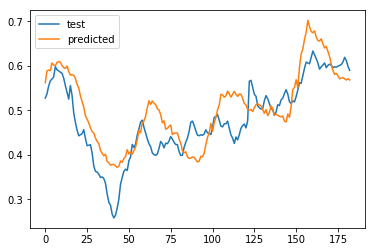

In [1034]:
# Here we plotted the results to see it visually
pyplot.plot(inv_y, label='test')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()

In [1035]:
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 0.055


In [1036]:
#Tweak number 4, #We changed the batch size on the LSTM algorithm on the base model

In [1037]:
# frame as a supervised learning problem
reframed4 = series_to_supervised(data_frame_without_missing_vals, 12, 1)
# Here we dropped the columns we did not want to predict (month and day)
reframed4.drop(reframed4.columns[[36, 37]], axis=1, inplace=True)

In [1038]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed4)

In [1039]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
data_frame_without_missing_vals = scaled
n_train_days =  20 * 52
train = data_frame_without_missing_vals[:n_train_days, :]
test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1040]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1040, 1, 24255) (1040,) (171, 1, 24255) (171,)


In [1041]:
# create the LSTM neural network
model4 = Sequential()
model4.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model4.add(Dense(1))
model4.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
history = model4.fit(train_X, train_y, epochs=50, batch_size=50, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 1040 samples, validate on 171 samples
Epoch 1/50
 - 20s - loss: 1.2255 - val_loss: 1.0191
Epoch 2/50
 - 7s - loss: 0.9149 - val_loss: 0.6581
Epoch 3/50
 - 9s - loss: 0.5644 - val_loss: 0.3188
Epoch 4/50
 - 9s - loss: 0.3744 - val_loss: 0.0931
Epoch 5/50
 - 9s - loss: 0.3073 - val_loss: 0.0720
Epoch 6/50
 - 8s - loss: 0.2831 - val_loss: 0.0891
Epoch 7/50
 - 9s - loss: 0.2769 - val_loss: 0.0939
Epoch 8/50
 - 9s - loss: 0.2756 - val_loss: 0.0950
Epoch 9/50
 - 9s - loss: 0.2752 - val_loss: 0.0950
Epoch 10/50
 - 8s - loss: 0.2751 - val_loss: 0.0949
Epoch 11/50
 - 9s - loss: 0.2753 - val_loss: 0.0952
Epoch 12/50
 - 9s - loss: 0.2751 - val_loss: 0.0951
Epoch 13/50
 - 8s - loss: 0.2751 - val_loss: 0.0949
Epoch 14/50
 - 8s - loss: 0.2751 - val_loss: 0.0948
Epoch 15/50
 - 8s - loss: 0.2752 - val_loss: 0.0952
Epoch 16/50
 - 9s - loss: 0.2750 - val_loss: 0.0951
Epoch 17/50
 - 9s - loss: 0.2750 - val_loss: 0.0949
Epoch 18/50
 - 8s - loss: 0.2750 - val_loss: 0.0948
Epoch 19/50
 - 9s - loss:

In [1042]:
# Here we predict the gas prices
yhat = model4.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
rmse4 = sqrt(mean_squared_error(inv_y, inv_yhat))

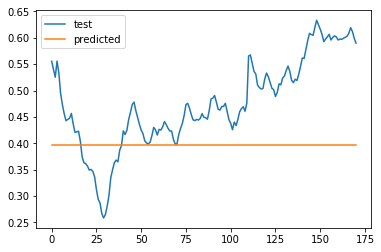

In [1043]:
# Here we plotted the results to see it visually
pyplot.plot(inv_y, label='test')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()

In [1044]:
print('Test RMSE: %.3f' % rmse4)

Test RMSE: 0.115


In [1045]:
#Tweak number 5, #We changed the batch size on the LSTM algorithm when we changed the number 
#of variables to 1 to have a single input for each feature(columns)

In [1046]:
# frame as a supervised learning problem
reframed5 = series_to_supervised(data_frame_without_missing_vals, 1, 1)
# Here we dropped the columns we did not want to predict (month and day)
reframed5.drop(reframed5.columns[[3, 4]], axis=1, inplace=True)

In [1047]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(reframed5)

In [1048]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
data_frame_without_missing_vals = scaled
n_train_days =  20 * 52
train = data_frame_without_missing_vals[:n_train_days, :]
test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1049]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1040, 1, 48509) (1040,) (170, 1, 48509) (170,)


In [1050]:
# create the LSTM neural network
model5 = Sequential()
model5.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model5.add(Dense(1))
model5.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
history = model5.fit(train_X, train_y, epochs=50, batch_size=50, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False)

Train on 1040 samples, validate on 170 samples
Epoch 1/50
 - 28s - loss: 1.8198 - val_loss: 1.6655
Epoch 2/50
 - 19s - loss: 1.5601 - val_loss: 1.3042
Epoch 3/50
 - 15s - loss: 1.1992 - val_loss: 0.9435
Epoch 4/50
 - 17s - loss: 0.8388 - val_loss: 0.5839
Epoch 5/50
 - 16s - loss: 0.5107 - val_loss: 0.2660
Epoch 6/50
 - 17s - loss: 0.3550 - val_loss: 0.0928
Epoch 7/50
 - 16s - loss: 0.3047 - val_loss: 0.0682
Epoch 8/50
 - 17s - loss: 0.2838 - val_loss: 0.0810
Epoch 9/50
 - 15s - loss: 0.2778 - val_loss: 0.0884
Epoch 10/50
 - 17s - loss: 0.2763 - val_loss: 0.0926
Epoch 11/50
 - 15s - loss: 0.2755 - val_loss: 0.0944
Epoch 12/50
 - 17s - loss: 0.2750 - val_loss: 0.0946
Epoch 13/50
 - 15s - loss: 0.2749 - val_loss: 0.0944
Epoch 14/50
 - 17s - loss: 0.2750 - val_loss: 0.0948
Epoch 15/50
 - 15s - loss: 0.2749 - val_loss: 0.0946
Epoch 16/50
 - 17s - loss: 0.2749 - val_loss: 0.0946
Epoch 17/50
 - 16s - loss: 0.2749 - val_loss: 0.0945
Epoch 18/50
 - 17s - loss: 0.2748 - val_loss: 0.0944
Epoch 19

In [1051]:
# Here we predict the gas prices
yhat = model5.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
rmse5 = sqrt(mean_squared_error(inv_y, inv_yhat))

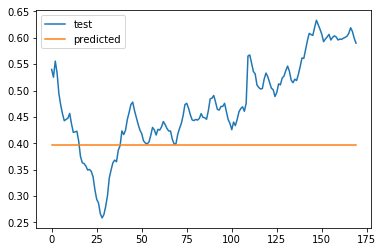

In [1052]:
# Here we plotted the results to see it visually
pyplot.plot(inv_y, label='test')
pyplot.plot(inv_yhat, label='predicted')
pyplot.legend()
pyplot.show()

In [1053]:
print('Test RMSE: %.3f' % rmse5)

Test RMSE: 0.115


In [1054]:
#!!!!!!!The following tweaks were not usefull for the scope of this project. They did not improve our accuracy!!!!!!!

In [1055]:
#Tweak number 6, #We used the LSTM with 40 neurons for predicting prices on the base model

In [1056]:
# frame as a supervised learning problem
#reframed6 = series_to_supervised(data_frame_without_missing_vals, 12, 1)
# Here we dropped the columns we did not want to predict (month and day)
#reframed6.drop(reframed6.columns[[36, 37]], axis=1, inplace=True)

In [1057]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(reframed6)

In [1058]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
#data_frame_without_missing_vals = scaled
#n_train_days =  20 * 52
#train = data_frame_without_missing_vals[:n_train_days, :]
#test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1059]:
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [1060]:
# create the LSTM neural network
#model6 = Sequential()
#model6.add(LSTM(40, input_shape=(train_X.shape[1], train_X.shape[2])))
#model6.add(Dense(1))
#model6.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
#history = model6.fit(train_X, train_y, epochs=50, batch_size=50, validation_data=(test_X, test_y), verbose=2,
 #                   shuffle=False)

In [1061]:
# Here we predict the gas prices
#yhat = model6.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
#inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
#test_y = test_y.reshape((len(test_y), 1))
#inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
#rmse6 = sqrt(mean_squared_error(inv_y, inv_yhat))

In [1062]:
# Here we plotted the results to see it visually
#pyplot.plot(inv_y, label='test')
#pyplot.plot(inv_yhat, label='predicted')
#pyplot.legend()
#pyplot.show()

In [1063]:
#print('Test RMSE: %.3f' % rmse6)

In [1064]:
#Tweak number 7, #We used the LSTM with 55 neurons for predicting prices when we change the number 
#of variables to 1 to have a single input for each feature(columns)

In [1065]:
# frame as a supervised learning problem
#reframed7 = series_to_supervised(data_frame_without_missing_vals, 12, 1)
# Here we dropped the columns we did not want to predict (month and day)
#reframed7.drop(reframed6.columns[[36, 37]], axis=1, inplace=True)

In [1066]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(reframed7)

In [1067]:
# Here we split our dataset into train and test sets. 20 years for our training set and 3 years for our test set
#data_frame_without_missing_vals = scaled
#n_train_days =  20 * 52
#train = data_frame_without_missing_vals[:n_train_days, :]
#test = data_frame_without_missing_vals[n_train_days:, :]
# Here we split the data into input and outputs for training and testing our model
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
# Here we reshaped input to be in a 3-Dimensiontional format [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1068]:
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [1069]:
# create the LSTM neural network
#model7 = Sequential()
#model7.add(LSTM(40, input_shape=(train_X.shape[1], train_X.shape[2])))
#model7.add(Dense(1))
#model7.compile(loss='mae', optimizer='adam')
# fit the LSTM neural network
#history = model7.fit(train_X, train_y, epochs=50, batch_size=50, validation_data=(test_X, test_y), verbose=2,
 #                   shuffle=False)

In [1070]:
# Here we predict the gas prices
#yhat = model7.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for the gas prices
#inv_yhat = np.concatenate((test_X[:, 0:], yhat), axis=1)
#inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:, -1]
# invert scaling to get the correct values
#test_y = test_y.reshape((len(test_y), 1))
#inv_y = np.concatenate((test_X[:, 0:], test_y), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
#inv_y = inv_y[:, -1]
# calculate the RMSE to see how accurate our model is
#rmse7 = sqrt(mean_squared_error(inv_y, inv_yhat))

In [1071]:
# Here we plotted the results to see it visually
#pyplot.plot(inv_y, label='test')
#pyplot.plot(inv_yhat, label='predicted')
#pyplot.legend()
#pyplot.show()

In [1072]:
#print('Test RMSE: %.3f' % rmse7)

In [1073]:
print('Test RMSE of base model: %.3f' % rmse)
#We changed number of variables to 1 to have a single input for each feature(columns)
print('Test RMSE of tweak #1: %.3f' % rmse1)
#We changed number of EPOCH(estimated predication of current history) on the base model
print('Test RMSE of tweak #2: %.3f' % rmse2)
#We changed number of EPOCH(estimated predication of current history) when number 
#of variables to 1 to have a single input for each feature(columns)
print('Test RMSE of tweak #3: %.3f' % rmse3)
#We changed the batch size on the LSTM algorithm on the base model
print('Test RMSE of tweak #4: %.3f' % rmse4)
#We changed the batch size on the LSTM algorithm when we changed the number 
#of variables to 1 to have a single input for each feature(columns)
print('Test RMSE of tweak #5: %.3f' % rmse5)
#We used the LSTM with 40 neurons for predicting prices on the base model
#print('Test RMSE of tweak #6: %.3f' % rmse6)
#We used the LSTM with 55 neurons for predicting prices when we change the number 
#of variables to 1 to have a single input for each feature(columns)
#print('Test RMSE of tweak #7: %.3f' % rmse7)

Test RMSE of base model: 0.169
Test RMSE of tweak #1: 0.031
Test RMSE of tweak #2: 0.057
Test RMSE of tweak #3: 0.055
Test RMSE of tweak #4: 0.115
Test RMSE of tweak #5: 0.115


In [1074]:
#From this we can see that tweak #1 is the best

In [1075]:
print(GasPricePrediction)

[2.54493441 2.516984   2.48471102 2.45846369 2.44686804 2.51108869
 2.49029985 2.54983494 2.55210394 2.51530298 2.51457132 2.55882727
 2.52511898 2.56424024 2.62561082 2.66599436 2.67501755 2.73021245
 2.75958567 2.78995842 2.80931839 2.83307248 2.84551868 2.8499501
 2.88255797 2.86463122 2.86325612 2.88079971 2.83921068 2.8294757
 2.82760708 2.80698843 2.75464312 2.71421775 2.65104234 2.60744404
 2.60359737 2.54209674 2.55915098 2.52361155 2.47592247 2.43850258
 2.42420727 2.39708582 2.34046943 2.28197259 2.2471775  2.23708077
 2.21453244 2.20602283 2.23063192 2.2754397  2.21920883 2.1871402
 2.2214093  2.13068368 2.08530136 2.06956591 2.01934584 2.07825565
 2.07606615 2.08082839 2.11603777 2.14219064 2.11961022 2.18093433
 2.22775478 2.29881074 2.30481093 2.33119617 2.36168941 2.39196239
 2.46261759 2.46325337 2.48239024 2.50312806 2.48984401 2.47987827
 2.48266256 2.45741967 2.43319525 2.41284711 2.39532529 2.38131573
 2.37097498 2.37851771 2.36016362 2.3589463  2.373741   2.3548708